# KNN

## import dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [5]:
# Load the dataset
df = pd.read_csv("Zoo.csv")

In [7]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 1. Data Analysis - Visualizing the target class distribution

C:\Users\dnyan\AppData\Local\Temp\ipykernel_13392\674760003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["type"], palette="viridis")


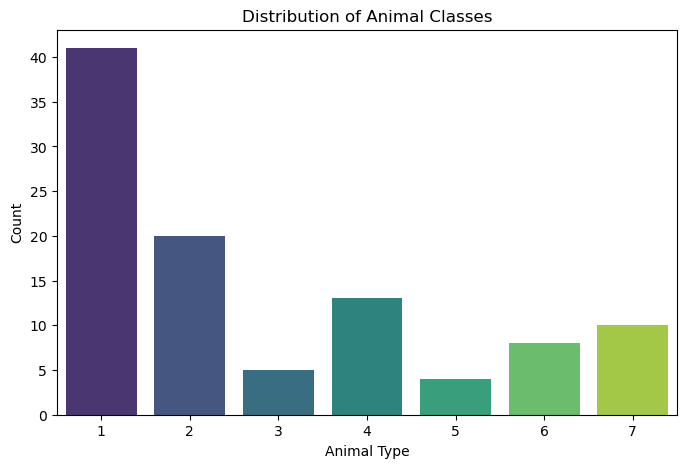

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["type"], palette="viridis")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Distribution of Animal Classes")
plt.show()

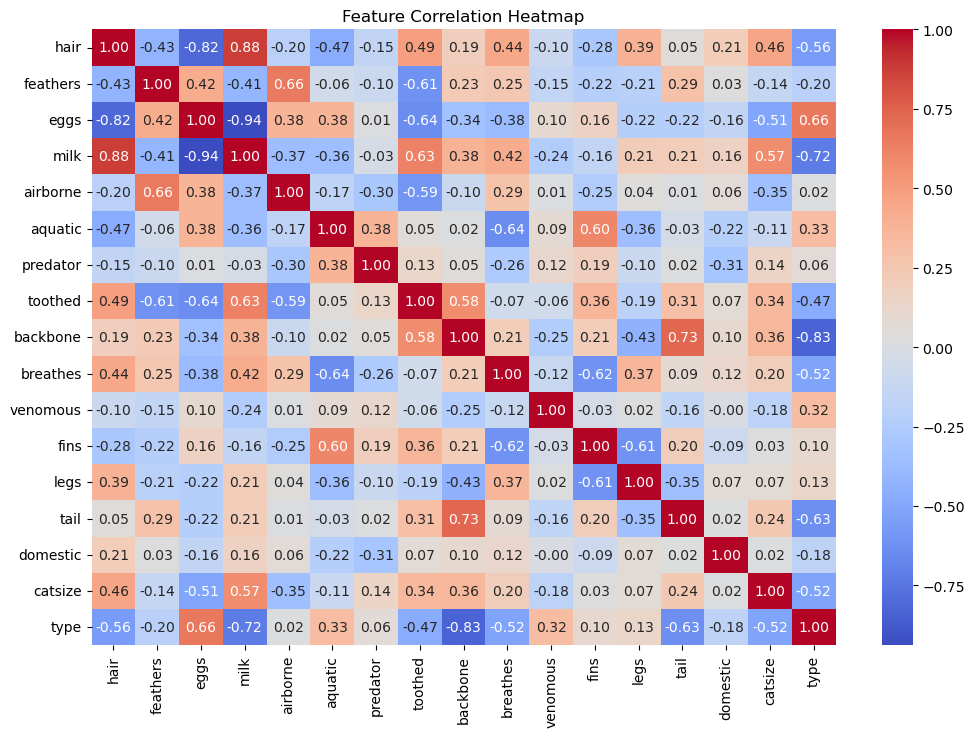

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["animal name"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Data Preprocessing - Handling Missing Values & Outliers

In [25]:
# Check for missing values
df_cleaned = df.drop(columns=["animal name"])
if df_cleaned.isnull().sum().sum() > 0:
    df_cleaned = df_cleaned.fillna(df_cleaned.median())

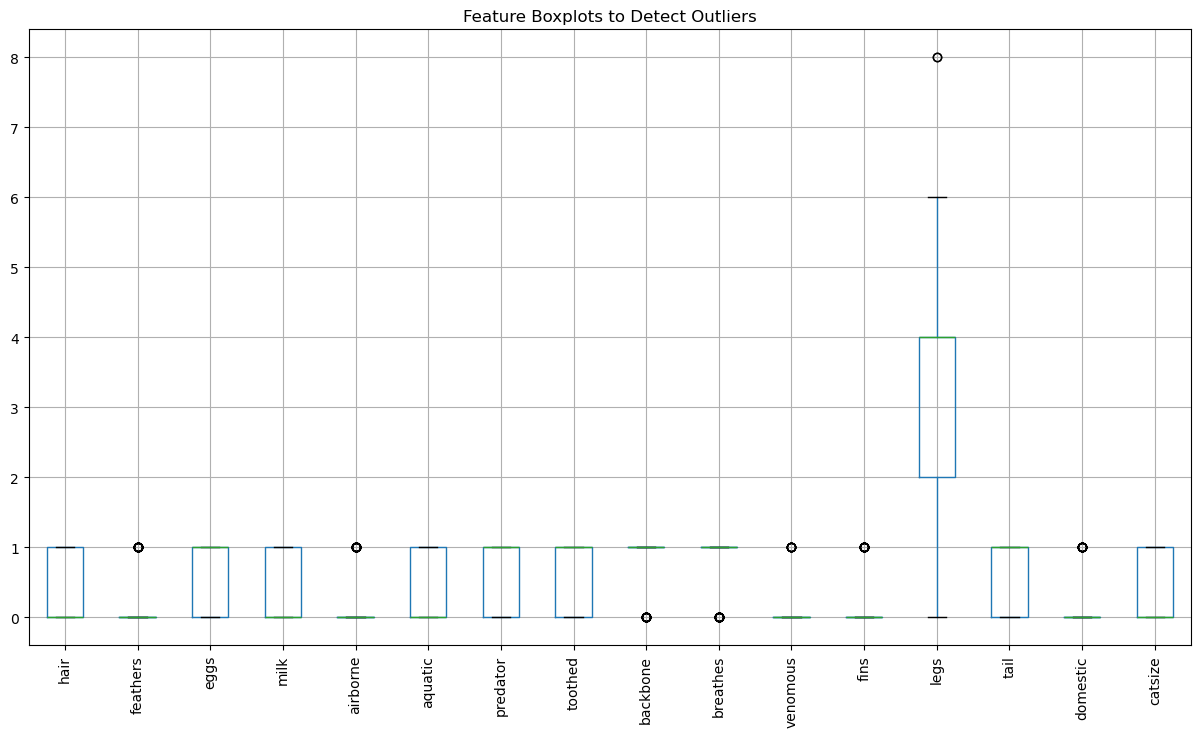

In [27]:
# Boxplot for Outliers
plt.figure(figsize=(15, 8))
df_cleaned.drop(columns=["type"]).boxplot(rot=90)
plt.title("Feature Boxplots to Detect Outliers")
plt.show()

In [29]:
# Scaling the features
X = df_cleaned.drop(columns=["type"])
y = df_cleaned["type"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 4. Implement KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

# 5. Make Predictions

In [39]:
y_pred = knn.predict(X_test)

# 6. Evaluate Model

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# 7. Visualize Decision Boundaries

In [45]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [47]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

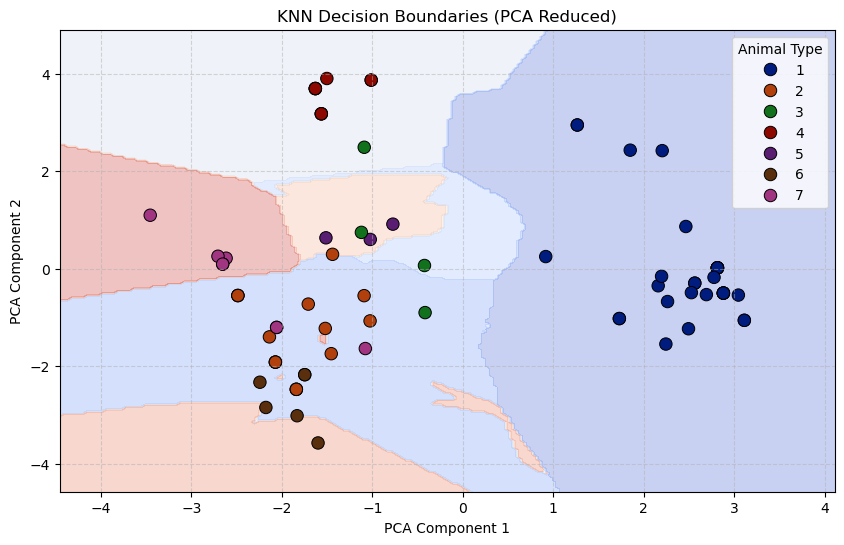

In [53]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="dark", edgecolor="black", s=80)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundaries (PCA Reduced)")
plt.legend(title="Animal Type")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Interview Question

### 1. What are the key hyperparameters in KNN?

1. K (Neighbors) → Number of nearest neighbors.

2. Distance Metric → Euclidean, Manhattan, etc.

3. Weights → uniform (equal influence) or distance (closer neighbors have more influence).

4. Algorithm → auto, ball_tree, kd_tree, brute.

5. Leaf Size → Affects speed of ball_tree and kd_tree.

6. P (Power Parameter) → For Minkowski distance:
    p=1 → Manhattan
    p=2 → Euclidean

### 2. What distance metrics can be used in KNN?

1.Euclidean → Straight-line distance.

2.Manhattan → Sum of absolute differences.

3.Minkowski → Generalization of Euclidean & Manhattan.

4.Chebyshev → Maximum feature difference.

5.Hamming → For categorical data.

6.Mahalanobis → Accounts for variable correlation.